# Kapitel 4

In [9]:
# plot 
import matplotlib.pyplot as plt
# zufallszahlen generator
from random import choice 
# mathematische operationen
#from numpy import array,dot,zeros,random
import numpy as np
# Basisklassen
from sklearn.base import BaseEstimator, ClassifierMixin
# Prüfroutinen für Konsistenz der Daten
from sklearn.utils.validation import check_X_y, check_is_fitted, check_random_state
# Puffern der unterschiedlichen Zielwerte
from sklearn.utils.multiclass import unique_labels
%matplotlib inline

In [3]:
%matplotlib inline

## Kochrezept Perceptron

1. Heavside Funktion definieren
2. fit-Funktion mit iterationen, Trainingsdaten und Gewichten: zufällige Auswahl aus Trainingsdaten, Fehlerberechnung über Heavside Funktion, Trainging über anpassen der Gewichte
3. main() funktion zum Zusammensetzen der Bausteine



In [8]:
# heavside funktion als lambda funktion
heavside = lambda x: 0 if x < 0 else 1

In [9]:
# Training
def fit(iterations,training_data_set,w):
    """ Lernen im Perceptron
    
    iterations: Ein Vorwärts- und Rückwärtslauf aller Trainingsbeispiele
    trainings_data_set: Die Trainningsbeispiele
    w: Die Gewichte zum Starten
    
    """
    errors = []
    weights =  []
    for i in range(iterations):
        # zufällige Auswahl eines Trainingsbeispiels
        training_data = choice(training_data_set)
        x = training_data[0]
        y = training_data[1]
        # den errechneten output ermitteln: gewichtete Summe mit
        # nachgelagerter Stufenfunktion
        y_hat = heavside(dot(w,x))
        # Fehler berechnen als Differenz zwischen gewünschtem und 
        # aktuellem output
        error = y-y_hat
        # Fehler sammeln für die Ausgabe 
        errors.append(error)
        # Gewchte sammeln für spätere Ausgabe
        weights.append(w)
        # gewichtsanpassung = das lernen... x_i ist entweder 0 oder 1
        w += error*x
        # Rückgabe der Fehler und Gewicht
    return errors , weights
    
def main():
    """ Hauptprogramm
    Hier werden die einzelnen Bausteine zusammengesetzt
    """
    # Trainingsdaten 
    # Pro Zeile: die binären Inputdaten und die gewünschte binäre Ausgabe
    # in einer Liste von Tupeln
    # An der Indexposition 0 des Inputvektors ist das Bias-Neuron

    training_data_set = [
        (array([1,0,0]),0),
        (array([1,0,1]),1),
        (array([1,1,0]),1),
        (array([1,1,1]),1),
    ]

    # Anfangsinit des Zufallsgenerators für Reproduzierbarkeit

    random.seed(12)

    # Array von Länge 3 mit 0 init
    w = zeros(3)
    # Die Anzahl der Durchläufe, Erfahrungswert durch Probieren
    iterations = 30

    # Trainieren mit fit()
    # Wir sammeln die Fehler/Gewichte in jedem Schritt für die grafische Ausgabe
    errors, weights = fit(iterations, training_data_set,w)

    # den letzten Gewichtsvektor ausgeben 
    w = weights[iterations-1]
    print("Gewichtsvektor am Ende des Trainings:")
    print(w)
    # Auswertung nach dem Trainieren 
    print("Auswertung am Ende des Trainings:")
    for x,y in training_data_set:
        y_hat = heavside(dot(x,w))
        print("{}: {} -> {}".format(x,y,y_hat))

    # Grafik für Fehler pro Lernbeispiel
    # Figure Nummern Start
    fignr = 1
    # Druckgröße in inch 
    plt.figure(fignr,figsize=(10,10))
    # Ausgabe Fehler als Plot 
    plt.plot(errors)
    # Raster
    plt.style.use('seaborn-whitegrid')
    # Labels
    plt.xlabel('Iteration')
    # Label der Y-Achse mithilfe von LaTex
    plt.ylabel(r"$(y-\hat y)$")
    # Plot anzeigen
    plt.show()
    

Gewichtsvektor am Ende des Trainings:
[-1.  1.  1.]
Auswertung am Ende des Trainings:
[1 0 0]: 0 -> 0
[1 0 1]: 1 -> 1
[1 1 0]: 1 -> 1
[1 1 1]: 1 -> 1


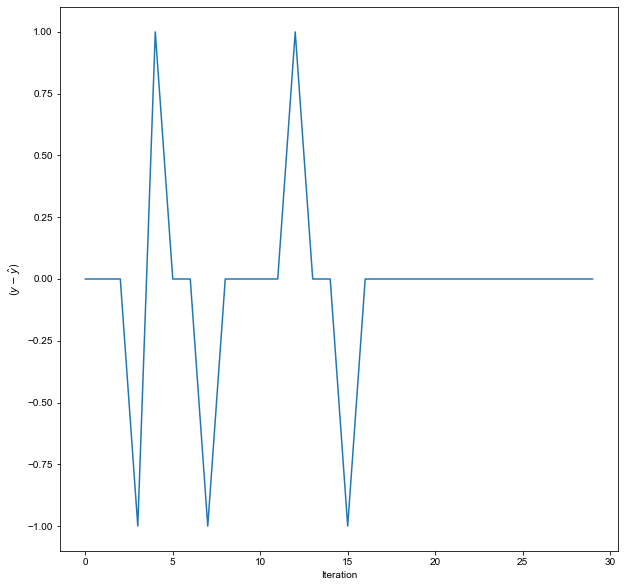

In [10]:
# Hauptprogramm
main()

In [34]:
w_u = array([-0.28,0.02,0.05])

In [35]:
knn_u = array([1,0,1])

In [36]:
y_uhat = heavside(dot(w_u,knn_u))

In [37]:
error_u = 1 - y_uhat

In [41]:
w_u += error_u * knn_u

In [26]:
class PerceptronEstimator(BaseEstimator, ClassifierMixin):
    def __init__(self,n_iterations=20,random_state=None):
        self.n_iterations = n_iterations
        self.random_state = random_state
        self.errors = []
    def heavside(self,x):
        if x<0:
            result = 0
        else:
            result = 1
        return result
    def fit(self,X=None,y=None):
        # if no random_state yet, generate 1, else return self.random state
        random_state = check_random_state(self.random_state)
        # initialisierung Gewichte
        self.w = random_state.random_sample(np.size(X,1))
        # Prüfe of X und y die korrekte Shape haben ('X' is 2D and 'y' is 1D)
        # X: N Zeilen = Anzahl der Lernbeispiele, D Spalten = Anzahl der Features
        X,y = check_X_y(X,y)
        self.class_ = unique_labels(y)
        self.X_ = X
        self.y_ = y
        # Lernen
        for i in range(self.n_iterations):
            # zufällige Zeile aus Batch
            rand_index = random_state.randint(0,np.size(X,0))
            x_ = X[rand_index]
            # Dazu passender Output
            y_ = y[rand_index]
            # Den errechneten Output ermitteln
            y_hat = self.heavside(np.dot(self.w,x_))
            # Fehler berechnen
            error = y_ - y_hat
            # Fehler sammeln für die Ausgabe
            self.errors.append(error)
            # Gewichtsanpassung = Das Lernen
            self.w += error* x_
            # Rückgabe des Estimators für zukünftige Aufrufe
        return self
    def predict(self,x):
        check_is_fitted(self, ['X_','y_'])
        y_hat = self.heavside(np.dot(self.w,x))
        return y_hat
    def plot(self):
        fignr = 1
        plt.figure(fignr,figsize=(10,10))
        plt.plot(self.errors)
        plt.style.use('seaborn-v0_8-seaborn-whitegrid')
        plt.xlabel('Iteration')
        plt.ylabel(r"$(y-\hat y)$")

In [27]:
def main():
    X = np.array([[1,0,0],[1,0,1],[1,1,0],[1,1,1]])
    y = np.array([0,1,1,1])
    Perceptron = PerceptronEstimator(30,10)
    Perceptron.fit(X,y)
    x = np.array([1,0,0])
    for index,x in  enumerate(X):
        p =Perceptron.predict(x)
        print("{}: {} -> {}".format(x,y[index],p))
        Perceptron.plot()

[1 0 0]: 0 -> 0


OSError: 'seaborn-v0_8-seaborn-whitegrid' not found in the style library and input is not a valid URL or path; see `style.available` for list of available styles

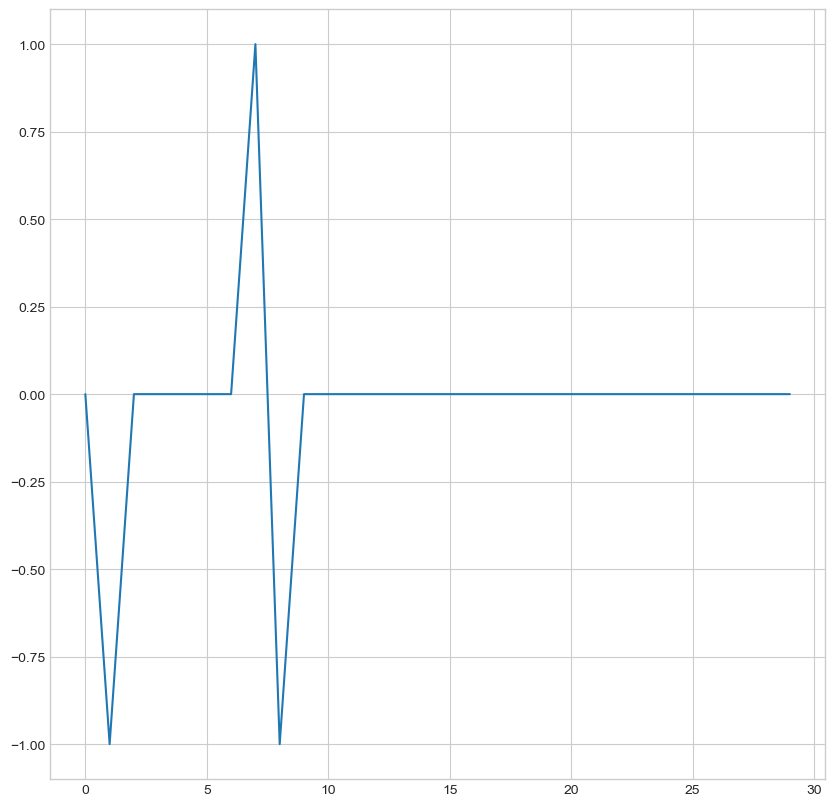

In [28]:
main()